<a href="https://colab.research.google.com/github/jacr2006/keras/blob/master/modelling_gas_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

### Data visualization

Source data from https://www.cne.cl/en/estadisticas/hidrocarburo/

In [ ]:
DIR_GAS_CONSUMPTION='/content/drive/My Drive/Consumo_mensual_GN-1.xls'# 

data_gas=pd.read_excel(DIR_GAS_CONSUMPTION,skiprows=7,index_col=0)#
data_gas=data_gas.iloc[:,0:7]#delete colums without data
data_gas=data_gas.dropna(axis=0)#delete rows (nan)

In [ ]:
data_gas.head(10)

,Res-Com,Industrial,GNC,Generación,Petroquímica,Otros,Total
2006/1,23845.7,102511.971408,2594.776790,277166.112877,398567,736.936000,805422.451467
2006/2,21916.3,96065.289183,2120.722244,265056.067953,348128,681.493906,733967.537036
2006/3,29768.6,115035.990882,2653.021904,285310.629806,387048,982.738694,820798.956242
2006/4,37879.4,80942.483095,2556.255207,206046.660428,374579,1271.259632,703275.320253
2006/5,50226.2,58714.494554,2844.100560,168434.001342,390701,1528.434197,672448.344972
2006/6,62010,27943.101009,2628.132921,106221.226230,342083,1791.350432,542676.964399
2006/7,65361.2,74504.917671,2873.393860,153137.151742,293214,1791.063650,590882.155455
2006/8,63770.1,45319.960324,2936.161240,104704.550160,340027,1808.622380,558566.611765
2006/9,53705.8,76250.537450,2746.288292,134140.563391,324215,1675.845179,592734.192255
2006/10,44792.8,100538.399495,2997.030213,176643.475191,355750,1514.711450,682236.506840


In [ ]:
data_gas.shape

(154, 7)

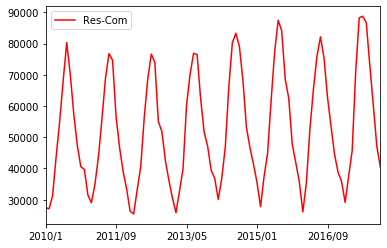

In [ ]:
#data_gas.plot(kind='bar',y='Res-Com',color='red')
#data_gas.plot(kind='line',y='Res-Com',color='red')
data_gas.loc['2010/1':'2017/12'].plot(kind='line',y='Res-Com',color='red')

In [ ]:
y=data_gas['Res-Com'].to_numpy()

(array([6.86584864e-06, 2.23140081e-05, 2.05975459e-05, 1.71646216e-05,
        3.08963189e-05, 2.40304702e-05, 2.05975459e-05, 6.86584864e-06,
        1.54481594e-05, 1.54481594e-05, 1.54481594e-05, 1.02987730e-05,
        1.20152351e-05, 8.58231080e-06, 1.54481594e-05, 5.14938648e-06,
        5.14938648e-06, 8.58231080e-06, 1.71646216e-06, 1.71646216e-06]),
 array([20879.76809444662, 24662.843915265054, 28445.919736083488,
        32228.995556901922, 36012.07137772036, 39795.14719853879,
        43578.223019357225, 47361.29884017566, 51144.37466099409,
        54927.45048181253, 58710.52630263096, 62493.6021234494,
        66276.67794426784, 70059.75376508627, 73842.82958590469,
        77625.90540672313, 81408.98122754158, 85192.05704836,
        88975.13286917843, 92758.20868999689, 96541.28451081531],
       dtype=object),
 <a list of 20 Patch objects>)

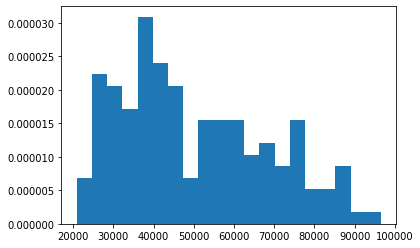

In [ ]:
plt.hist(y, 20, density=True)#data distribution: Not Gaussian

In [ ]:
y# 154-D dimension vector

array([23845.693392678153, 21916.34071909604, 29768.550375258073,
       37879.3906378333, 50226.20596132905, 62009.96375076079,
       65361.23044839852, 63770.11460538993, 53705.78092060679,
       44792.8195681506, 37429.13263732102, 34773.847933297395,
       28781.75667763631, 25123.92192148569, 32209.482362176197,
       41134.87844698696, 60952.00641837301, 71760.25682841857,
       58257.318045997985, 53265.776040913974, 51232.07713932653,
       39597.731537530606, 37935.986345738675, 29685.056566887968,
       25358.619872355343, 23731.434025595747, 28050.2808882,
       35282.2195549866, 43080.370386627845, 41692.78344984533,
       55022.14846487328, 57260.910988290714, 41836.32663873912,
       41422.65700930002, 38559.1595023, 25401.67087721111,
       25076.01996255376, 20879.76809444662, 25293.78491153799,
       30882.182765187797, 41269.326850531295, 37010.11493284362,
       44572.570610439674, 61554.30760823705, 59083.49387309899,
       47667.39511847578, 43000.384

Data normalization

In [ ]:
mean = np.mean(y) 
min = np.min(y)
max = np.max(y)
print( "mean: "+str(mean)+" ,min: "+str(min)+" ,max:"+str(max) )
y_norm = (y-mean)/(max-min)

mean: 49961.81349049414 ,min: 20879.76809444662 ,max:96541.28451081531


In [ ]:
y_norm

array([-0.34517045566596655, -0.37067024426344586, -0.2668894845314974,
       -0.159690466500443, 0.0034944114704223506, 0.1592374939191695,
       0.20353037696417167, 0.1825009829159132, 0.049483113839662314,
       -0.06831734502779907, -0.16564141781411335, -0.20073567483919694,
       -0.27993169864985307, -0.32827641772766525, -0.23462827562992628,
       -0.11666346990631495, 0.1452547272169295, 0.28810476409125385,
       0.10963968141813753, 0.04366767554905959, 0.016788768042158633,
       -0.1369795695863341, -0.15894245468960475, -0.2679930020437639,
       -0.3251744715602359, -0.34668059414182834, -0.2895994376019905,
       -0.19401664982135808, -0.09095037252488317, -0.10928977414547139,
       0.06688122593964271, 0.0964704098399154, -0.10739259846498589,
       -0.11285997010954371, -0.15070612549509094, -0.3246054768203095,
       -0.328909526356738, -0.3843703744451503, -0.32603137958809725,
       -0.2521708740320546, -0.1148864978085782, -0.17117947367558356,
   

In [ ]:
X=[x for x in range(len(data_gas.index))]#X index as base time

In [ ]:
# split dataset
train_size = int(len(y_norm) * 0.7)#70% for "training" and 30% para "validation"
test_size = len(y_norm) - train_size

train, test = y[0:train_size], y[train_size:len(y)]
train_norm, test_norm = y_norm[0:train_size], y_norm[train_size:len(y_norm)]

print(len(train_norm), len(test_norm))

107 47


In [ ]:
# transform data time serie to labeled data
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 15

X_train, y_train = create_dataset(train, train, time_steps)
X_test, y_test = create_dataset(test, test, time_steps)
X_train_norm, y_train_norm = create_dataset(train_norm, train_norm, time_steps)
X_test_norm, y_test_norm = create_dataset(test_norm, test_norm, time_steps)

X_train=np.expand_dims(X_train, axis=2)
X_test=np.expand_dims(X_test, axis=2)
X_train_norm=np.expand_dims(X_train_norm, axis=2)
X_test_norm=np.expand_dims(X_test_norm, axis=2)

# 15 previous observations(features) output the next
print(X_train_norm.shape, y_train_norm.shape)

(92, 15, 1) (92,)


In [ ]:
X_train_norm[2]

array([[-0.2668894845314974],
       [-0.159690466500443],
       [0.0034944114704223506],
       [0.1592374939191695],
       [0.20353037696417167],
       [0.1825009829159132],
       [0.049483113839662314],
       [-0.06831734502779907],
       [-0.16564141781411335],
       [-0.20073567483919694],
       [-0.27993169864985307],
       [-0.32827641772766525],
       [-0.23462827562992628],
       [-0.11666346990631495],
       [0.1452547272169295]], dtype=object)

In [ ]:
y_train_norm[1]

0.1452547272169295

##Trainnig model

In [ ]:
# create stack
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train_norm.shape[1], X_train_norm.shape[2])))
model.add(keras.layers.Dense(1, activation='linear'))#linear for lineal regression
#MAE es prefered for regression, 
#target variable have non Gaussioan distribution, so was preferred MAE
model.compile(loss='mean_absolute_error', optimizer=keras.optimizers.Adam(0.001))

In [ ]:
# fit model: disable "shuffle" for time series, 
history = model.fit(
    X_train_norm, y_train_norm, 
    epochs=100, 
    batch_size=16, 
    validation_split=0.2, 
    verbose=1, 
    shuffle=False
)

Train on 73 samples, validate on 19 samples
Epoch 1/100
73/73 [==============================] - 7s 94ms/step - loss: 0.1808 - val_loss: 0.2247
Epoch 2/100
73/73 [==============================] - 0s 2ms/step - loss: 0.1598 - val_loss: 0.2525
Epoch 3/100
73/73 [==============================] - 0s 1ms/step - loss: 0.1526 - val_loss: 0.2283
Epoch 4/100
73/73 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.2085
Epoch 5/100
73/73 [==============================] - 0s 1ms/step - loss: 0.1256 - val_loss: 0.1882
Epoch 6/100
73/73 [==============================] - 0s 2ms/step - loss: 0.0988 - val_loss: 0.1027
Epoch 7/100
73/73 [==============================] - 0s 1ms/step - loss: 0.0864 - val_loss: 0.0665
Epoch 8/100
73/73 [==============================] - 0s 2ms/step - loss: 0.0878 - val_loss: 0.0680
Epoch 9/100
73/73 [==============================] - 0s 1ms/step - loss: 0.0853 - val_loss: 0.0792
Epoch 10/100
73/73 [==============================] - 0s 2ms/ste

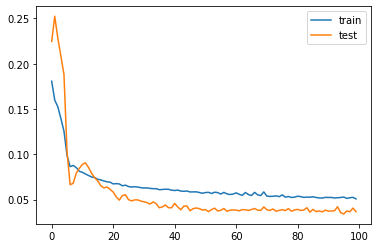

In [ ]:
#plot error vs epoch
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

## Inference

In [ ]:
y_pred_norm = model.predict(X_test_norm)
y_pred = ( y_pred_norm*(max-min) ) + mean# normalization reverse

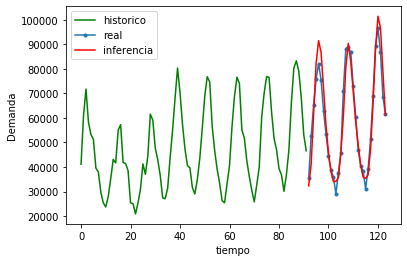

In [ ]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="historic")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="real")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="inference")
plt.ylabel('Demand')
plt.xlabel('time')
plt.legend()
plt.show();

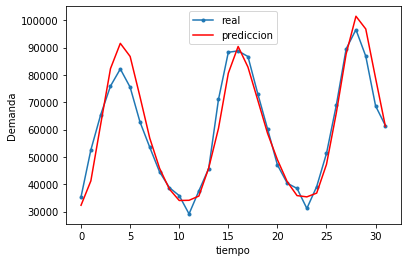

In [ ]:
plt.plot(y_test, marker='.', label="real")
plt.plot(y_pred, 'r', label="prediccion")
plt.ylabel('Demand')
plt.xlabel('time')
plt.legend()
plt.show();